# Data visualization and exploration with Pandas

Author: Alexandre Gramfort

### Data:

MovieLens 1M Data Set contain les grades given to movies by users on the Movielens website.

The data are available at:

https://moodle.polytechnique.fr/mod/folder/view.php?id=54149

and come from:

http://grouplens.org/datasets/movielens/

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np

### Load the "users" data as Pandas DataFrame

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### Read the "rating"

In [4]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [5]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


### Read the movies

In [6]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [7]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Let's merge everything as a single DataFrame

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

In [9]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


# Let's explore the data

### Question 1

How many movies have a grade higher than 4.5 ?
Is there a difference between Male or Females?

In [15]:
data[data['rating'] > 4.5]['movie_id'].nunique()

3232

In [16]:
data[data['rating'] > 4.5].groupby('gender')['movie_id'].nunique()

gender
F    2724
M    3100
Name: movie_id, dtype: int64

### Question 2

How many movies have a median grade higher than 4,5 among the men older than 30 years? And among the women older than 30?

In [34]:
men_older_than_30 = (data['gender'] == "M") & (data['age'] > 30)
data_men_older_than_30 = data[men_older_than_30]
(
    data_men_older_than_30
    .groupby('movie_id')
    .median()
    .query("rating > 4.5")
    ['rating']
    .count()
)

86

In [36]:
women_older_than_30 = (data['gender'] == "F") & (data['age'] > 30)
data_women_older_than_30 = data[women_older_than_30]
data_women_older_than_30.groupby('movie_id').median().query("rating > 4.5")['rating'].count()

149

### Question 3a

What are the most popular movies?

Hint: use the `DataFrame.nlargest` method.

In [74]:
data.groupby(['movie_id', 'title'])['rating'].mean().nlargest(10)

movie_id  title                                    
787       Gate of Heavenly Peace, The (1995)           5.0
989       Schlafes Bruder (Brother of Sleep) (1995)    5.0
1830      Follow the Bitch (1998)                      5.0
3172      Ulysses (Ulisse) (1954)                      5.0
3233      Smashing Time (1967)                         5.0
3280      Baby, The (1973)                             5.0
3382      Song of Freedom (1936)                       5.0
3607      One Little Indian (1973)                     5.0
3656      Lured (1947)                                 5.0
3881      Bittersweet Motel (2000)                     5.0
Name: rating, dtype: float64

### Question 3b

What are the most popular movies among the movies that have at least 30 grades? 

In [150]:
((data.groupby(['movie_id'])['user_id'].nunique()) == (data.groupby(['movie_id'])['user_id'].count())).all()

True

In [174]:
data_aggregated = data.groupby(['movie_id', 'title']).aggregate(['mean', 'nunique'])
data_aggregated[data_aggregated['user_id']['nunique'] > 30]['rating']['mean'].nlargest(10)

movie_id  title                                                              
2905      Sanjuro (1962)                                                         4.608696
2019      Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
318       Shawshank Redemption, The (1994)                                       4.554558
858       Godfather, The (1972)                                                  4.524966
745       Close Shave, A (1995)                                                  4.520548
50        Usual Suspects, The (1995)                                             4.517106
527       Schindler's List (1993)                                                4.510417
1148      Wrong Trousers, The (1993)                                             4.507937
922       Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
1198      Raiders of the Lost Ark (1981)                                         4.477725
Name: mean, dtype: flo

In [176]:
data_aggregated.head()

user_id            rating  \
                                                    mean nunique      mean   
movie_id title                                                               
1        Toy Story (1995)                    3053.819933    2077  4.146846   
2        Jumanji (1995)                      3027.977175     701  3.201141   
3        Grumpier Old Men (1995)             2632.156904     478  3.016736   
4        Waiting to Exhale (1995)            3268.841176     170  2.729412   
5        Father of the Bride Part II (1995)  3143.152027     296  3.006757   

                                                        timestamp          \
                                            nunique          mean nunique   
movie_id title                                                              
1        Toy Story (1995)                         5  9.705586e+08    2076   
2        Jumanji (1995)                           5  9.717322e+08     701   
3        Grumpier Old Men (1995)                  5  9.734544e+08     478   
4        Waiting to Exhale (1995)                 5  9.716206e+08     170   
5        Father of the Bride Part II (1995)       5  9.718301e+08     296   

                                                   age         occupation  \
                                                  mean nunique       mean   
movie_id title                                                              
1        Toy Story (1995)                    27.700530       7   8.067886   
2        Jumanji (1995)                      27.800285       7   7.680456   
3        Grumpier Old Men (1995)             29.276151       7   7.826360   
4        Waiting to Exhale (1995)            27.788235       7   6.752941   
5        Father of the Bride Part II (1995)  27.425676       7   7.506757   

                                                     
                                            nunique  
movie_id title                                       
1        Toy Story (1995)                        21  
2        Jumanji (1995)                          21  
3        Grumpier Old Men (1995)                 21  
4        Waiting to Exhale (1995)                18  
5        Father of the Bride Part II (1995)      20

What are the most popular movies among the movies that have at least 30 grades? 

In [202]:
data_count_ratings = data.groupby(['movie_id'])['user_id'].nunique()
#data_count_ratings
data_count_ratings_more_than_30 = data_count_ratings[data_count_ratings > 30]
#data_count_ratings_more_than_30
data_mean_ratings = data.groupby(['movie_id', 'title'])['rating'].mean().reset_index()
#data_mean_ratings
more_than_30_filter = data_mean_ratings['movie_id'].isin(data_count_ratings_more_than_30.index)
#more_than_30_filter
data_mean_ratings[more_than_30_filter].set_index(['title'])['rating'].nlargest(10)

title
Sanjuro (1962)                                                         4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Name: rating, dtype: float64

### Question 3c

What is the movie with the highest number of ratings?

In [179]:
data.groupby(['movie_id', 'title'])['rating'].count().nlargest(2)

movie_id  title                                    
2858      American Beauty (1999)                       3428
260       Star Wars: Episode IV - A New Hope (1977)    2991
Name: rating, dtype: int64

# Data Visualization

In [ ]:
%matplotlib inline 

### Question 4

Show the histogram of the ratings.

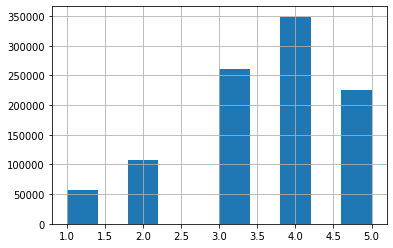

In [96]:
data['rating'].hist()

### Question 5

Show the histogram of the number of grades obtained for each movie.

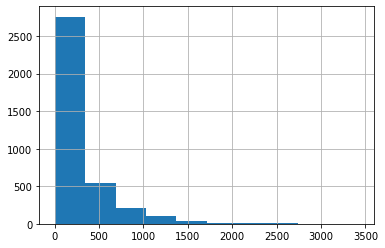

In [185]:
(
    data
    .groupby(['movie_id'])
    ['user_id']
    .nunique()
    .hist()
)

### Question 6

Show the histogram of the mean grade for each movie.

Does the distribution of the grade depend on the gender of the user?

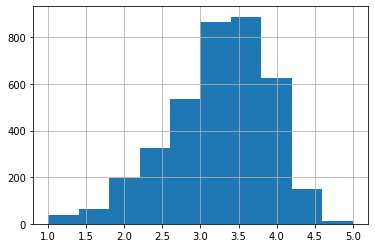

In [98]:
(
    data
    .groupby(['movie_id'])
    ['rating']
    .mean()
    .hist()
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3d8d90040>,
      dtype=object)

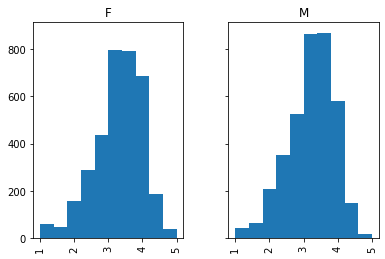

In [133]:
(
    data
    .groupby(['movie_id', 'gender'])
    ['rating']
    .mean()
    .reset_index()
    .hist(column='rating', by='gender', sharey=True, sharex=True)
)

### Question 7

Show the histogram of grades among the movies that have been graded at least 30 times.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3a1a79340>]],
      dtype=object)

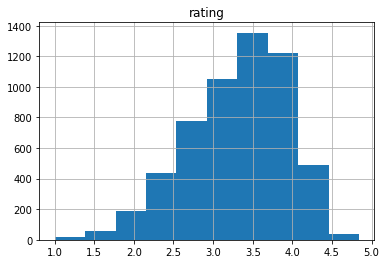

In [109]:
movies_number_of_ratings = (
    data
    .groupby('movie_id')
    ['user_id']
    .nunique()
)
movie_ids_more_than_30 = movies_number_of_ratings[movies_number_of_ratings > 30].index
(
    data
    [data['movie_id'].isin(movie_ids_more_than_30)]
    .groupby(['movie_id', 'gender'])
    ['rating']
    .mean()
    .reset_index()
    .hist(column='rating')
)

### Question 8

Show as "scatter plot" the mean grades for the men vs the grades of the women.

Now restrict the plot to the movies with at least 100 grades.

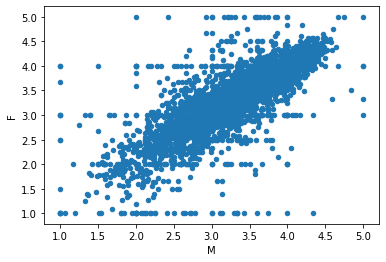

In [130]:
(
    data
    .groupby(['movie_id', 'gender'])
    ['rating']
    .mean()
    .reset_index()
    .pivot(index='movie_id', columns='gender', values='rating')
    .plot(x='M', y='F', kind='scatter')
)

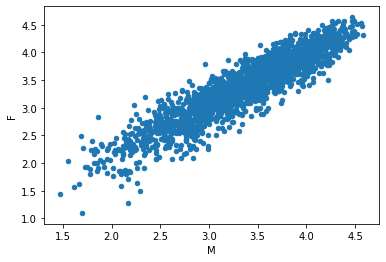

In [134]:
movies_number_of_ratings = (
    data
    .groupby('movie_id')
    ['user_id']
    .nunique()
)
movie_ids_more_than_100 = movies_number_of_ratings[movies_number_of_ratings > 100].index


(
    data
    [data.movie_id.isin(movie_ids_more_than_100)]
    .groupby(['movie_id', 'gender'])
    ['rating']
    .mean()
    .reset_index()
    .pivot(index='movie_id', columns='gender', values='rating')
    .plot(x='M', y='F', kind='scatter')
)

# Cluster analysis

In [18]:
import seaborn as sns

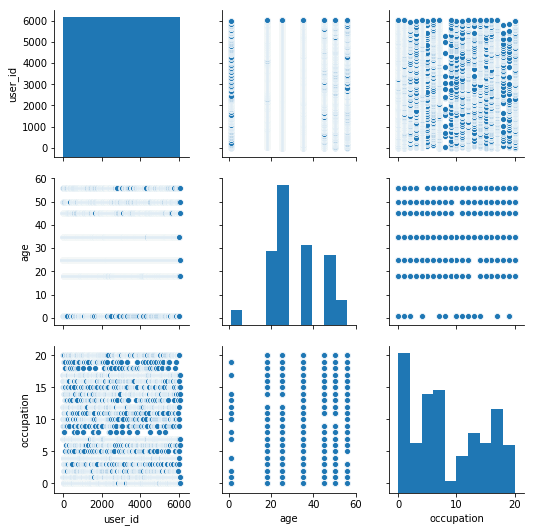

In [9]:
sns.pairplot(users)

In [ ]:
sns.pairplot(ratings)

In [11]:
import numpy as np

In [33]:
data['general_zip'] = data.zip.apply(lambda x: int(x[:2]))

In [35]:
ratings.shape

(1000209, 4)

In [36]:
ixs = np.arange(ratings.shape[0])
np.random.shuffle(ixs)
random_10000 = ixs[:10000]
random_10000

array([943589, 752692, 465550, ..., 593273, 735557, 738853])

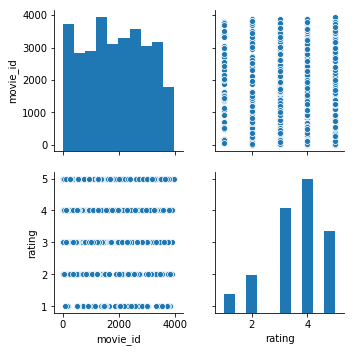

In [22]:
sns.pairplot(ratings.iloc[random_1000][['movie_id', 'rating']])

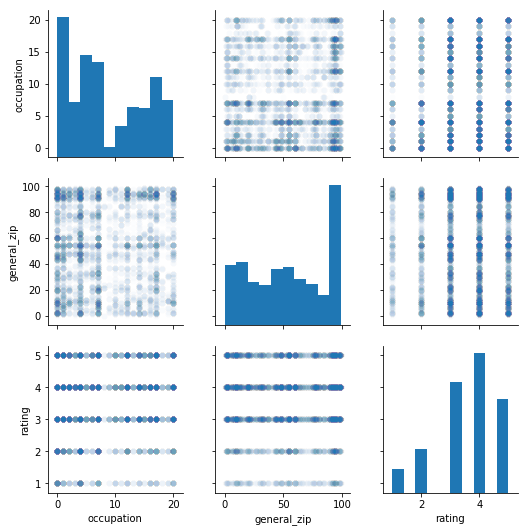

In [41]:
sns.pairplot(
    data[['occupation', 'general_zip', 'rating']].iloc[random_10000],
    plot_kws={'alpha': .01}
)